In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

In [3]:
my_dpi = 200                                    # 이미지 선명도(100~300)
font_path = "./NotoSansKR-Regular.ttf"          # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)               # 폰트의 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname=font_path)  # 폰트의 속성을 읽어옴
font_name = font_prop.get_name()                # 읽어온 속성에서 폰트의 이름만 추출     
plt.rcParams['font.family'] = font_name         # 그래프에 한글 폰트 적용
plt.rcParams['font.size'] = 6                # 기본 폰트크기
plt.rcParams['axes.unicode_minus'] = False      # 그래프에 마이너스 깨짐 방지(한글환경에서 필수)

In [5]:
origin = load_data('penguins')
origin

[data] https://data.hossam.kr/data/lab06/penguins.xlsx
[desc] 남극 팔머 군도의 펭귄 3종에 대해 신체 치수와 서식지 정보(출처: seaborn 내장 데이터)

field              description
-----------------  -------------
species            팽귄 종
island             서식지
bill_length_mm     부리 길이
bill_depth_mm      부리 두께
flipper_length_mm  날개 길이
body_mass_g        몸무게
sex                성별



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
...,...,...,...,...,...,...,...
329,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
330,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
331,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
332,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


In [8]:
df = origin.astype({"species": "category", "island": "category", "sex" : "category" 
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            334 non-null    category
 1   island             334 non-null    category
 2   bill_length_mm     334 non-null    float64 
 3   bill_depth_mm      334 non-null    float64 
 4   flipper_length_mm  334 non-null    int64   
 5   body_mass_g        334 non-null    int64   
 6   sex                333 non-null    category
dtypes: category(3), float64(2), int64(2)
memory usage: 11.9 KB


1.RegPlot

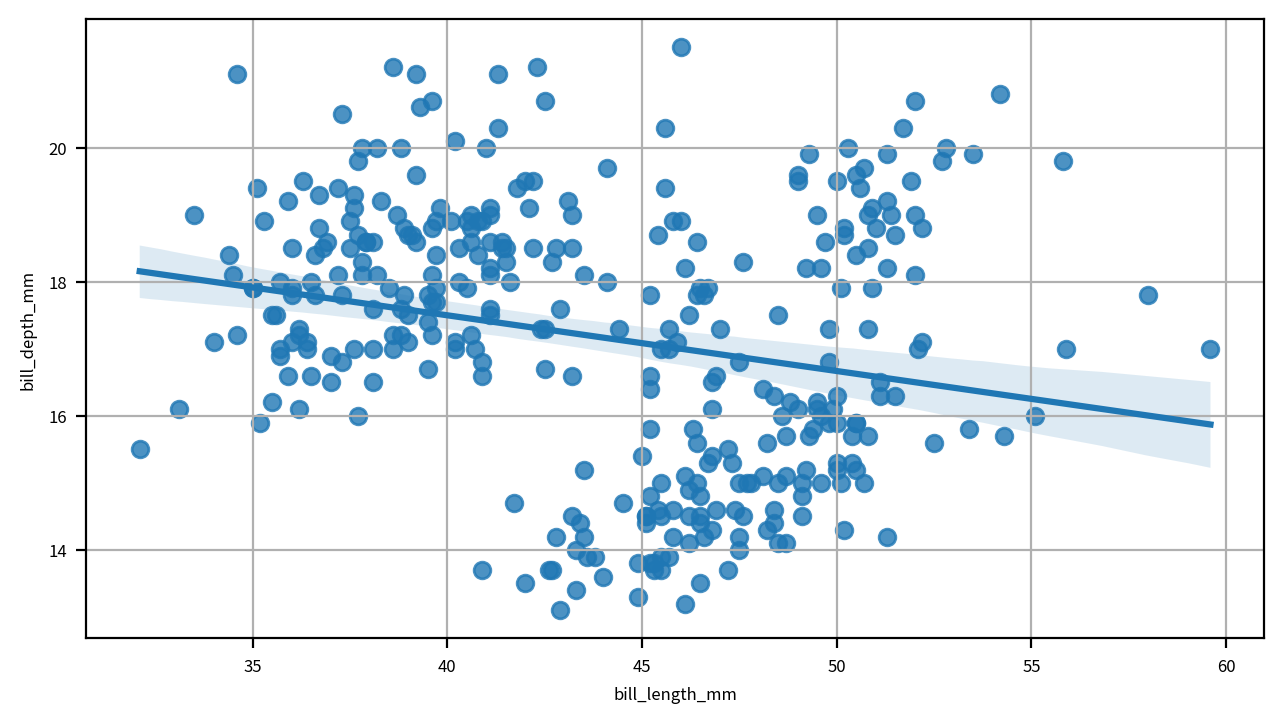

In [11]:
width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.regplot(data=origin, x='bill_length_mm', y='bill_depth_mm')



ax.grid(True)


plt.tight_layout()
plt.show()
plt.close()

2. LmPlot

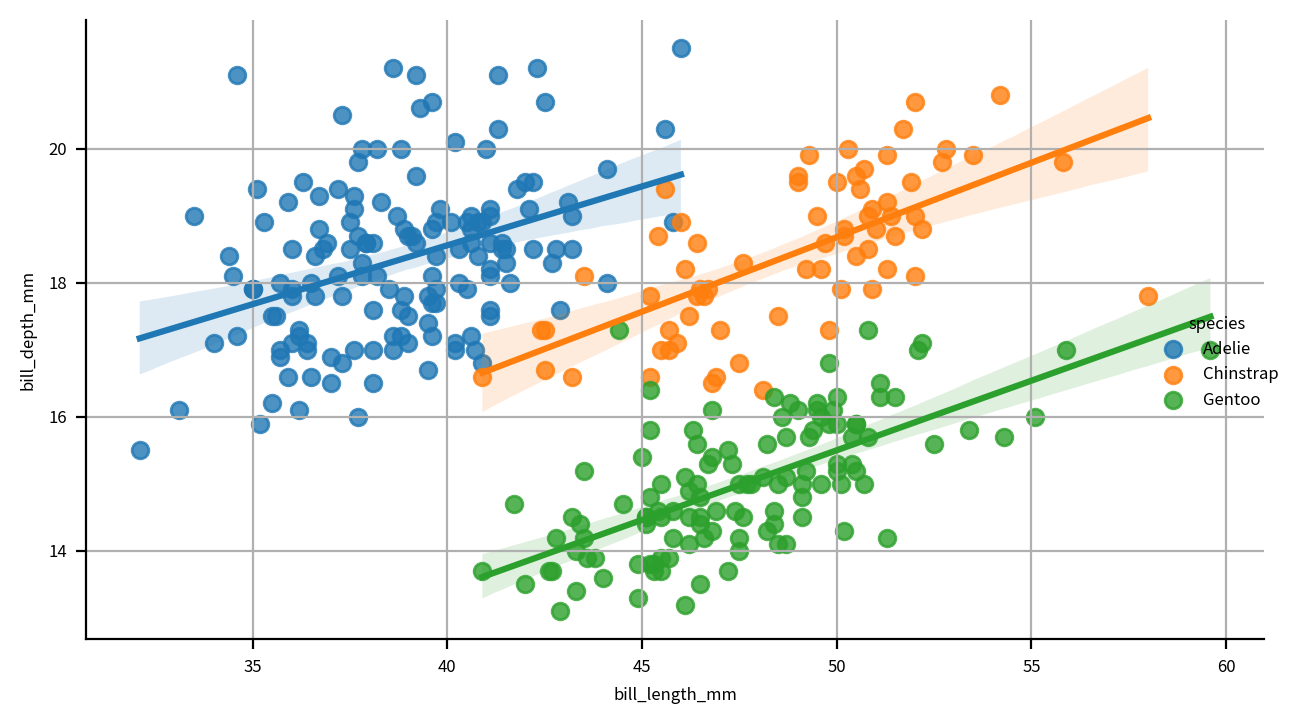

In [14]:
width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)


g = sb.lmplot(data=df, x="bill_length_mm", y="bill_depth_mm",hue="species")
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])
plt.grid()


plt.tight_layout()
plt.show()
plt.close()

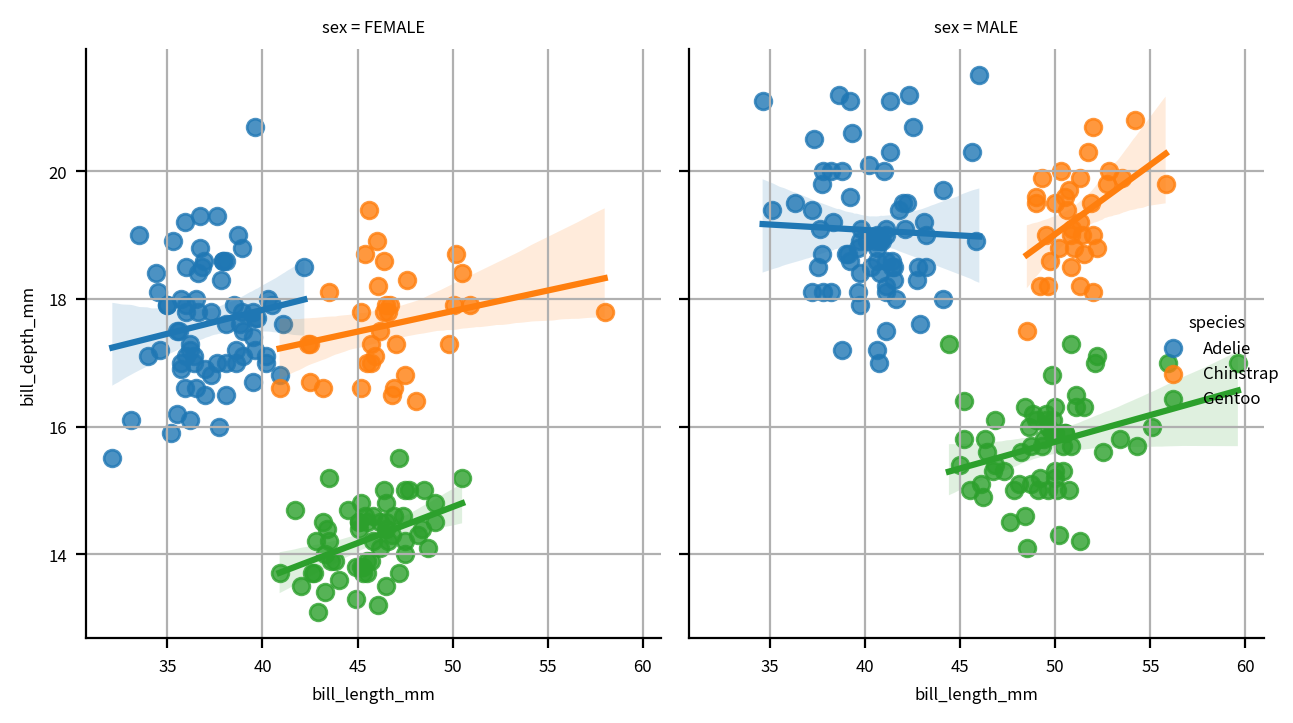

In [17]:
width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)

g = sb.lmplot(data= df, x="bill_length_mm", y="bill_depth_mm", hue="species", col="sex")
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])

for ax in g.axes.flatten():
    ax.grid(True)


plt.tight_layout()
plt.show()
plt.close()

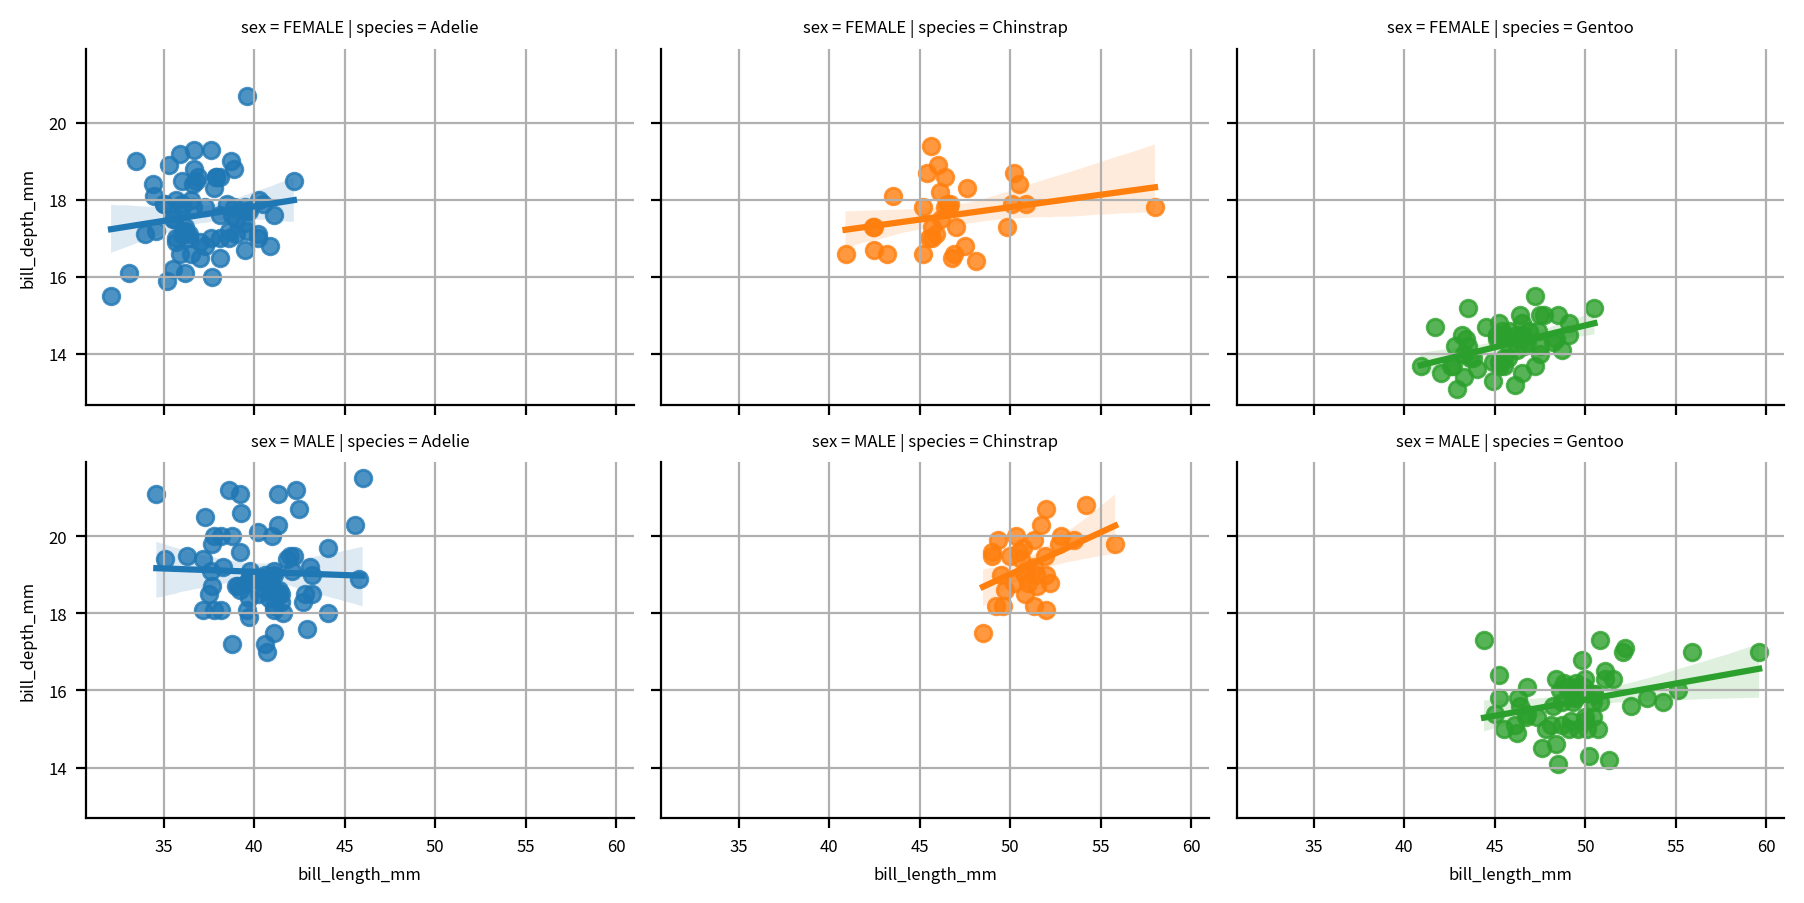

In [19]:
width_px = 1800
height_px = 900
figsize = (width_px/ my_dpi, height_px/ my_dpi)



g = sb.lmplot(data= df, x="bill_length_mm", y="bill_depth_mm", hue="species", col="species", row='sex')
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])






for ax in g.axes.flatten():
    ax.grid(True)





plt.tight_layout()
plt.show()
plt.close()

3.PairPlot(산점도 행)

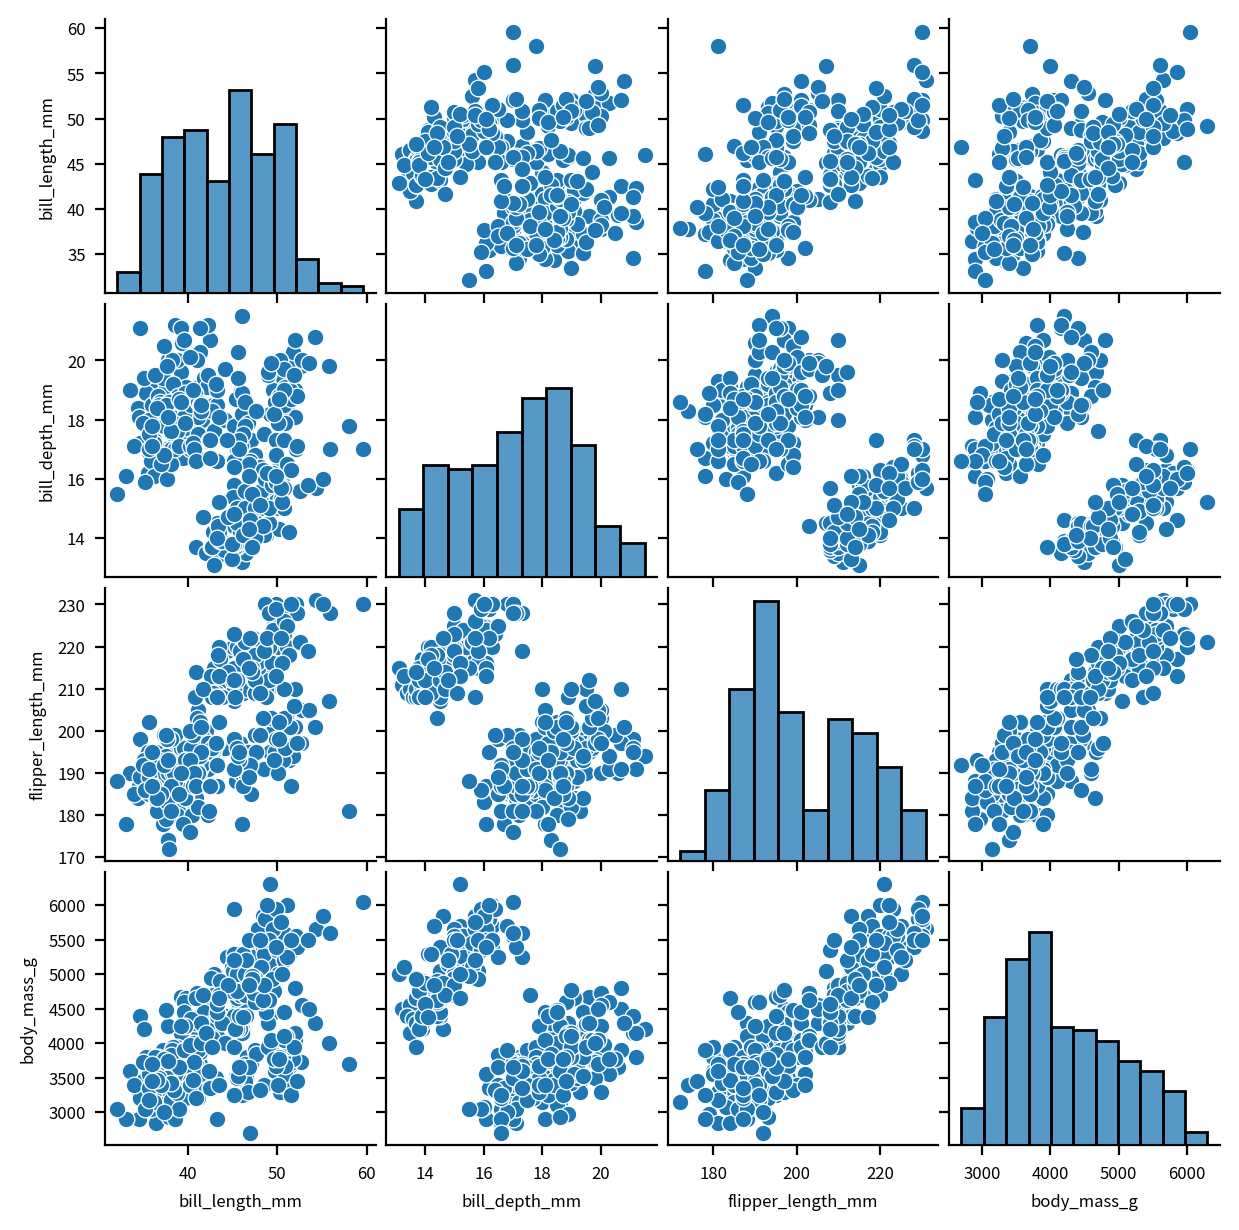

In [21]:
width_px = 1200
height_px = 1200
figsize = (width_px/ my_dpi, height_px/ my_dpi)


g = sb.pairplot(df)
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])



plt.grid()
plt.show()
plt.close()

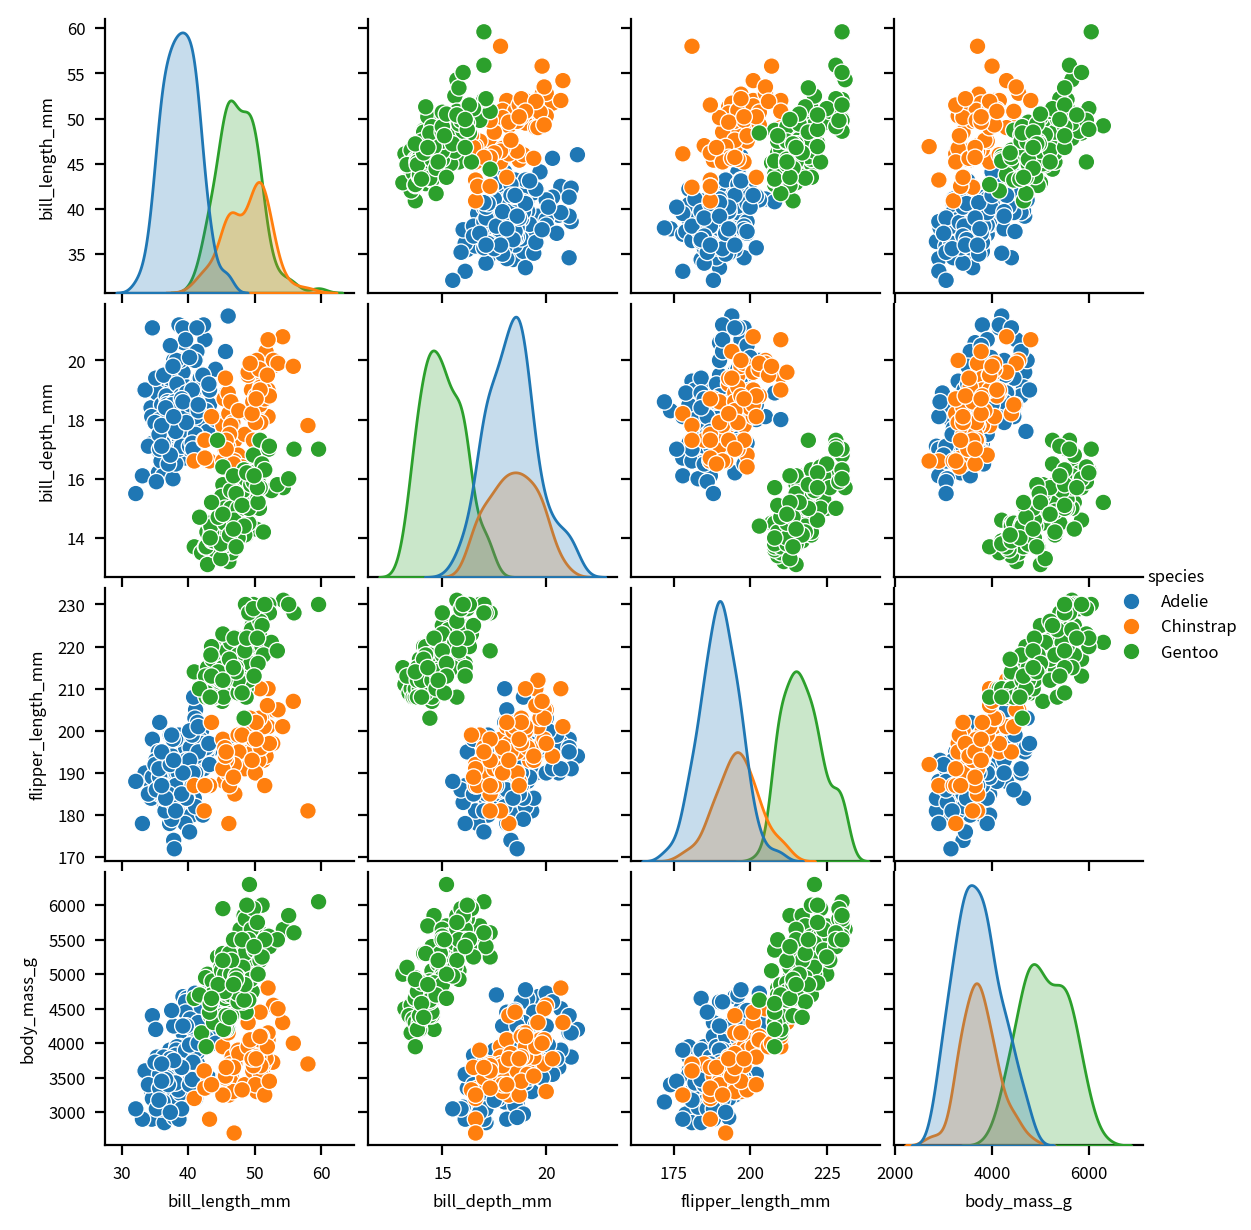

In [23]:
width_px = 1200
height_px = 1200
figsize = (width_px/ my_dpi, height_px/ my_dpi)

g = sb.pairplot(df, hue='species', diag_kind='kde')
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])


plt.grid()
plt.show()
plt.close()

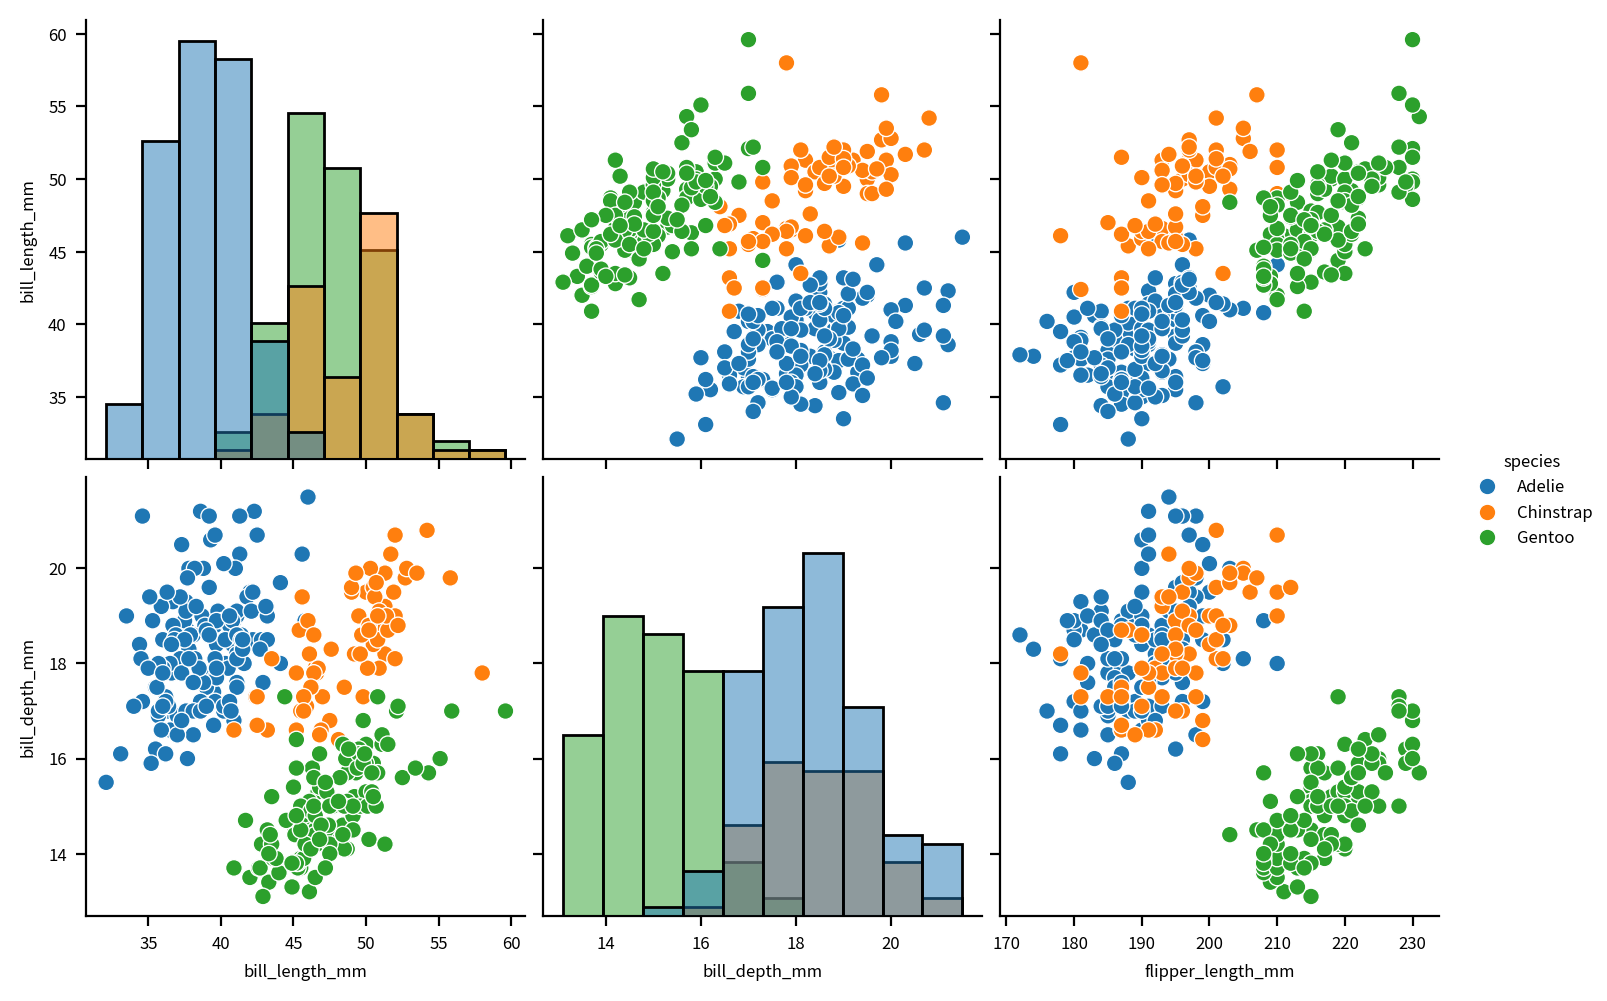

In [30]:
width_px = 1600
height_px = 1000
figsize = (width_px/ my_dpi, height_px/ my_dpi)


g = sb.pairplot(df, hue='species', diag_kind='hist',
                x_vars=["bill_length_mm", "bill_depth_mm",
                "flipper_length_mm"],
                y_vars=["bill_length_mm", "bill_depth_mm"])

g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])



plt.grid()
plt.show()
plt.close()

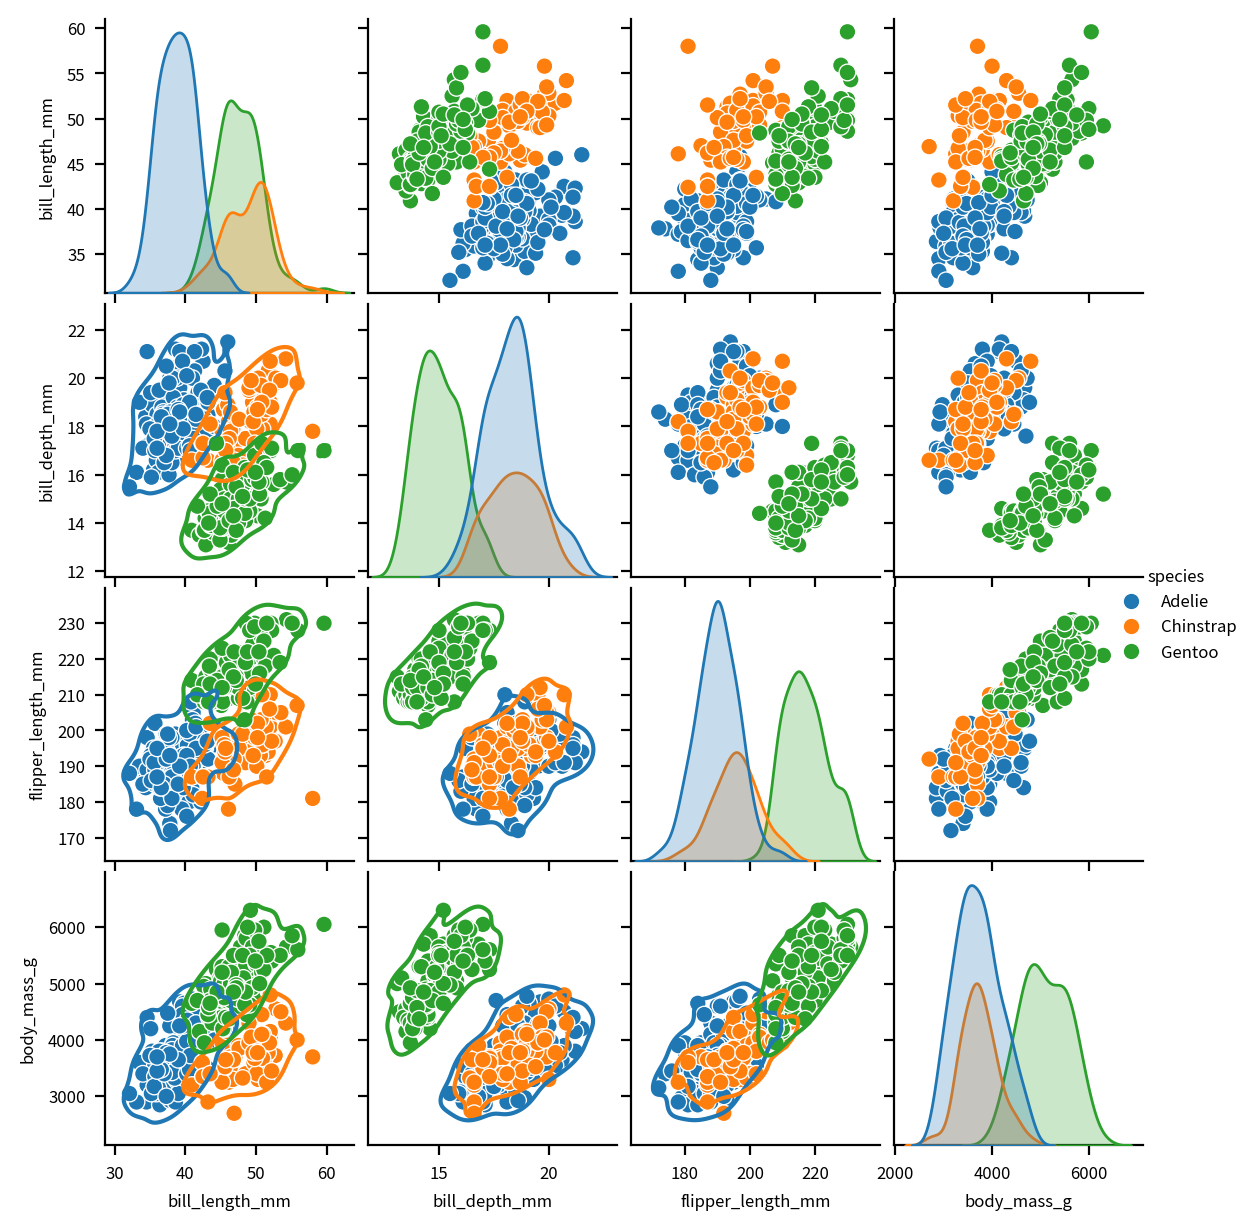

In [34]:
width_px = 1200
height_px = 1200
figsize = (width_px/ my_dpi, height_px/ my_dpi)


g = sb.pairplot(df, hue='species')
g.map_lower(sb.kdeplot, levels=1, color=0.2)
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])




plt.grid()
plt.show()
plt.close()